In [101]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [3]:
iris = pd.read_csv('Iris.csv')

In [42]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
iris_rel = iris.iloc[:,1:]
iris_rel

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Figure size 5000x5000 with 0 Axes>

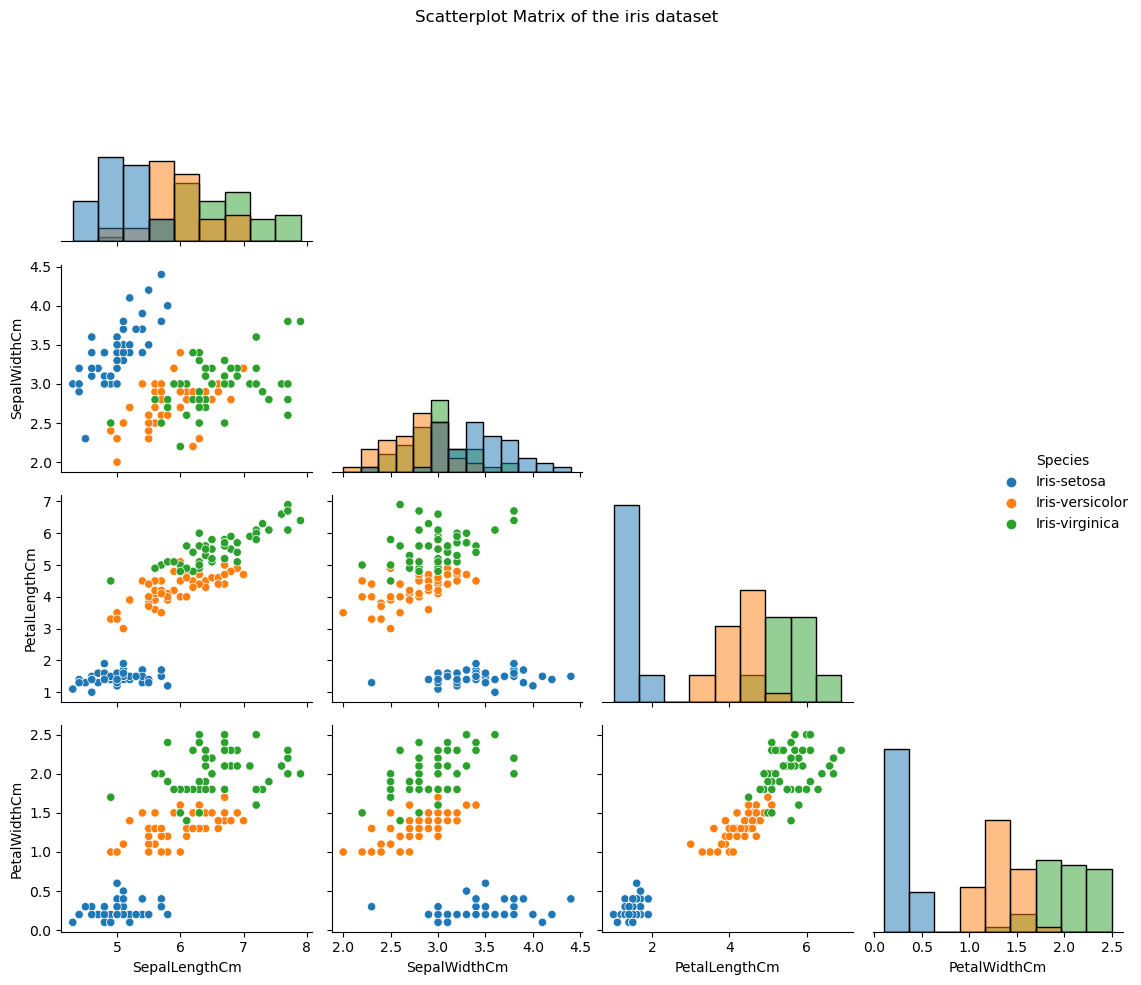

In [51]:
# plot 6 different scatter plots with different combination of variables.
plt.figure(figsize = (50,50))
s = sns.pairplot(iris_rel,corner = True, hue = 'Species',diag_kind = 'hist')
s.fig.suptitle('Scatterplot Matrix of the iris dataset')
plt.tight_layout()
plt.show()

Which of these plots looks the most promising for separating into
clusters?

All plots except sepalwidthcm and sepallengthcm chart look promising in terms of separating into different clusters. In particular petalwidthcm & petallengthcm chart and petalwidthcm & sepalwidthcm chart look like hard, monothetic clusters.

### Select two of the most promising plots and build a K-Nearest Neighbours model with k = 3 for each of these pairs of features

In [76]:
iris.iloc[:,3:5]

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [57]:
# Data Cleaning: we must convert our categorical dependent variable into discrete numeric/nominal values to allow machine learning algorithm to work
iris['Species_tag'] = LabelEncoder().fit_transform(iris['Species'])

In [58]:
iris[['Species','Species_tag']].drop_duplicates()

,Species,Species_tag
0,Iris-setosa,0
50,Iris-versicolor,1
100,Iris-virginica,2


In [102]:
# creating train test split
# petal width and petal length 
scaler = MinMaxScaler()
X1 = iris.iloc[:,3:5].values.reshape(-1,2)
X1 = scaler.fit_transform(X1)
# petal width and sepal width 
X2 = iris[['PetalWidthCm','SepalWidthCm']].values.reshape(-1,2)
X2 = scaler.fit_transform(X2)
y = iris['Species_tag'].values.reshape(-1,1)

# split the first set
x_train1,x_test1,y_train1,y_test1= train_test_split(X1,y,test_size = 0.4,shuffle=True,stratify = y)
# split the second set
x_train2,x_test2,y_train2,y_test2= train_test_split(X2,y,test_size = 0.4,shuffle=True,stratify = y)


In [103]:
# K-NEAREST NEIGHBOURS MODEL
knn = KNeighborsClassifier(n_neighbors = 3,p = 2, metric = 'minkowski') # p = 2 and minkowski mean euclideanknn
knn_model = knn.fit(x_train1,y_train1)
pred1 = knn_model.predict(x_test1)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [104]:
acc1 = accuracy_score(y_test,pred1)
print(f'The accuracy of the petal width and petal length knn model is {acc1}')

The accuracy of the petal width and petal length knn model is 0.35


In [105]:
knn_model2 = knn.fit(x_train2,y_train2)
pred2 = knn_model.predict(x_test2)
acc2 = accuracy_score(y_test,pred2)
print(f'The accuracy of the petal width and sepal width knn model is {acc2}')

The accuracy of the petal width and sepal width knn model is 0.3333333333333333


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Create a scatter plot showing the clusters predicted by the model

In [131]:
label_dict = {0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}

In [147]:
list(label_dict.values())

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [133]:
label_dict.get(0)

'Iris-setosa'

In [178]:
scatter1.legend_elements()[0]

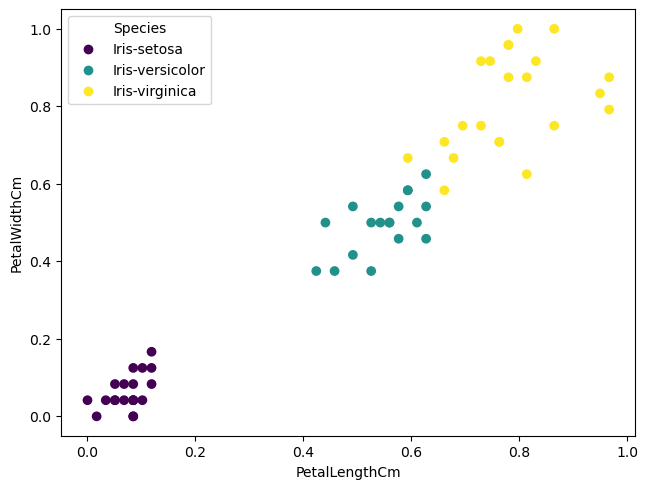

In [181]:
scatter1 = plt.scatter(x_test1[:,0],x_test1[:,1], c=pred1, cmap='viridis')
plt.legend(handles = scatter1.legend_elements()[0],labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],title = 'Species')
plt.tight_layout()
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

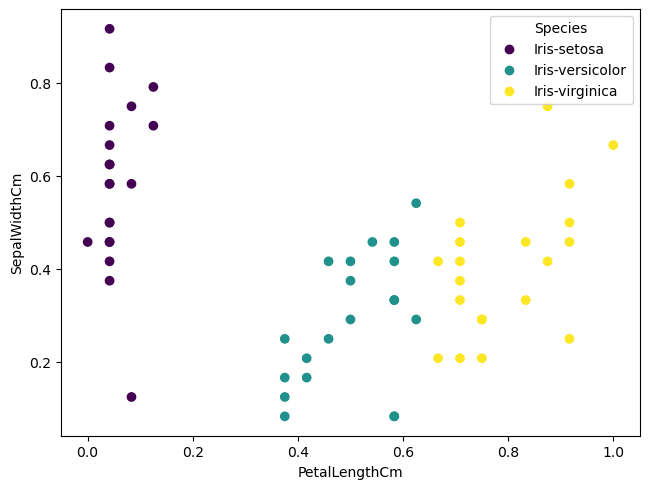

In [188]:
scatter2 = plt.scatter(x_test2[:,0],x_test2[:,1], c=pred2, cmap='viridis')
plt.legend(handles = scatter2.legend_elements()[0],labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],title = 'Species')
plt.tight_layout()
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()